# Selection of "normal" surface flux year from Tamura and eraInterim datasets
The aim is select a suitable year that represents present day surface forcing for CABROMS. To do so, plot the monthly averages of Tamura sea ice-ocean heat and salt fluxes for all provided years (1992-2007) on top of each other.
Subsequently do the same for wind stress from era interim and  determine a year which does not stand out based on both comparisons . Select the same year. You can't simply use a climatology, since this would kill the high frequency signal in the forcing.

## Tamuras surface heat and salt fluxes
### Loading the data (already monthly averages from year 1992-2007 preprocessed from raw data with matlab script read_tamura_daily_to_monthly.m) and explore it.

In [1]:
import os
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

tamura_data_path = '../data/external/1992-2007_Takeshi_subset_monthly.mat'
tamura_data = sio.loadmat(tamura_data_path)

In [6]:
for key,value in tamura_raw.items():
    print(key, type(value),np.shape(value))

__header__ <class 'bytes'> ()
__version__ <class 'str'> ()
__globals__ <class 'list'> (0,)
shfluxtmp <class 'numpy.ndarray'> (721, 721, 192)
ssfluxtmp <class 'numpy.ndarray'> (721, 721, 192)


### Make spatial averages for each month and reshape array to shape = (years,months)

In [3]:
shflux_avg = np.nanmean(tamura_data['shfluxtmp'],axis=(0,1))
ssflux_avg = np.nanmean(tamura_data['ssfluxtmp'],axis=(0,1))

In [5]:
shflux_avg_rs = np.reshape(shflux_avg,(16,-1))
ssflux_avg_rs = np.reshape(ssflux_avg,(16,-1))

### Plot tamura monthly mean surface heat and salt flux, all years on top of each other

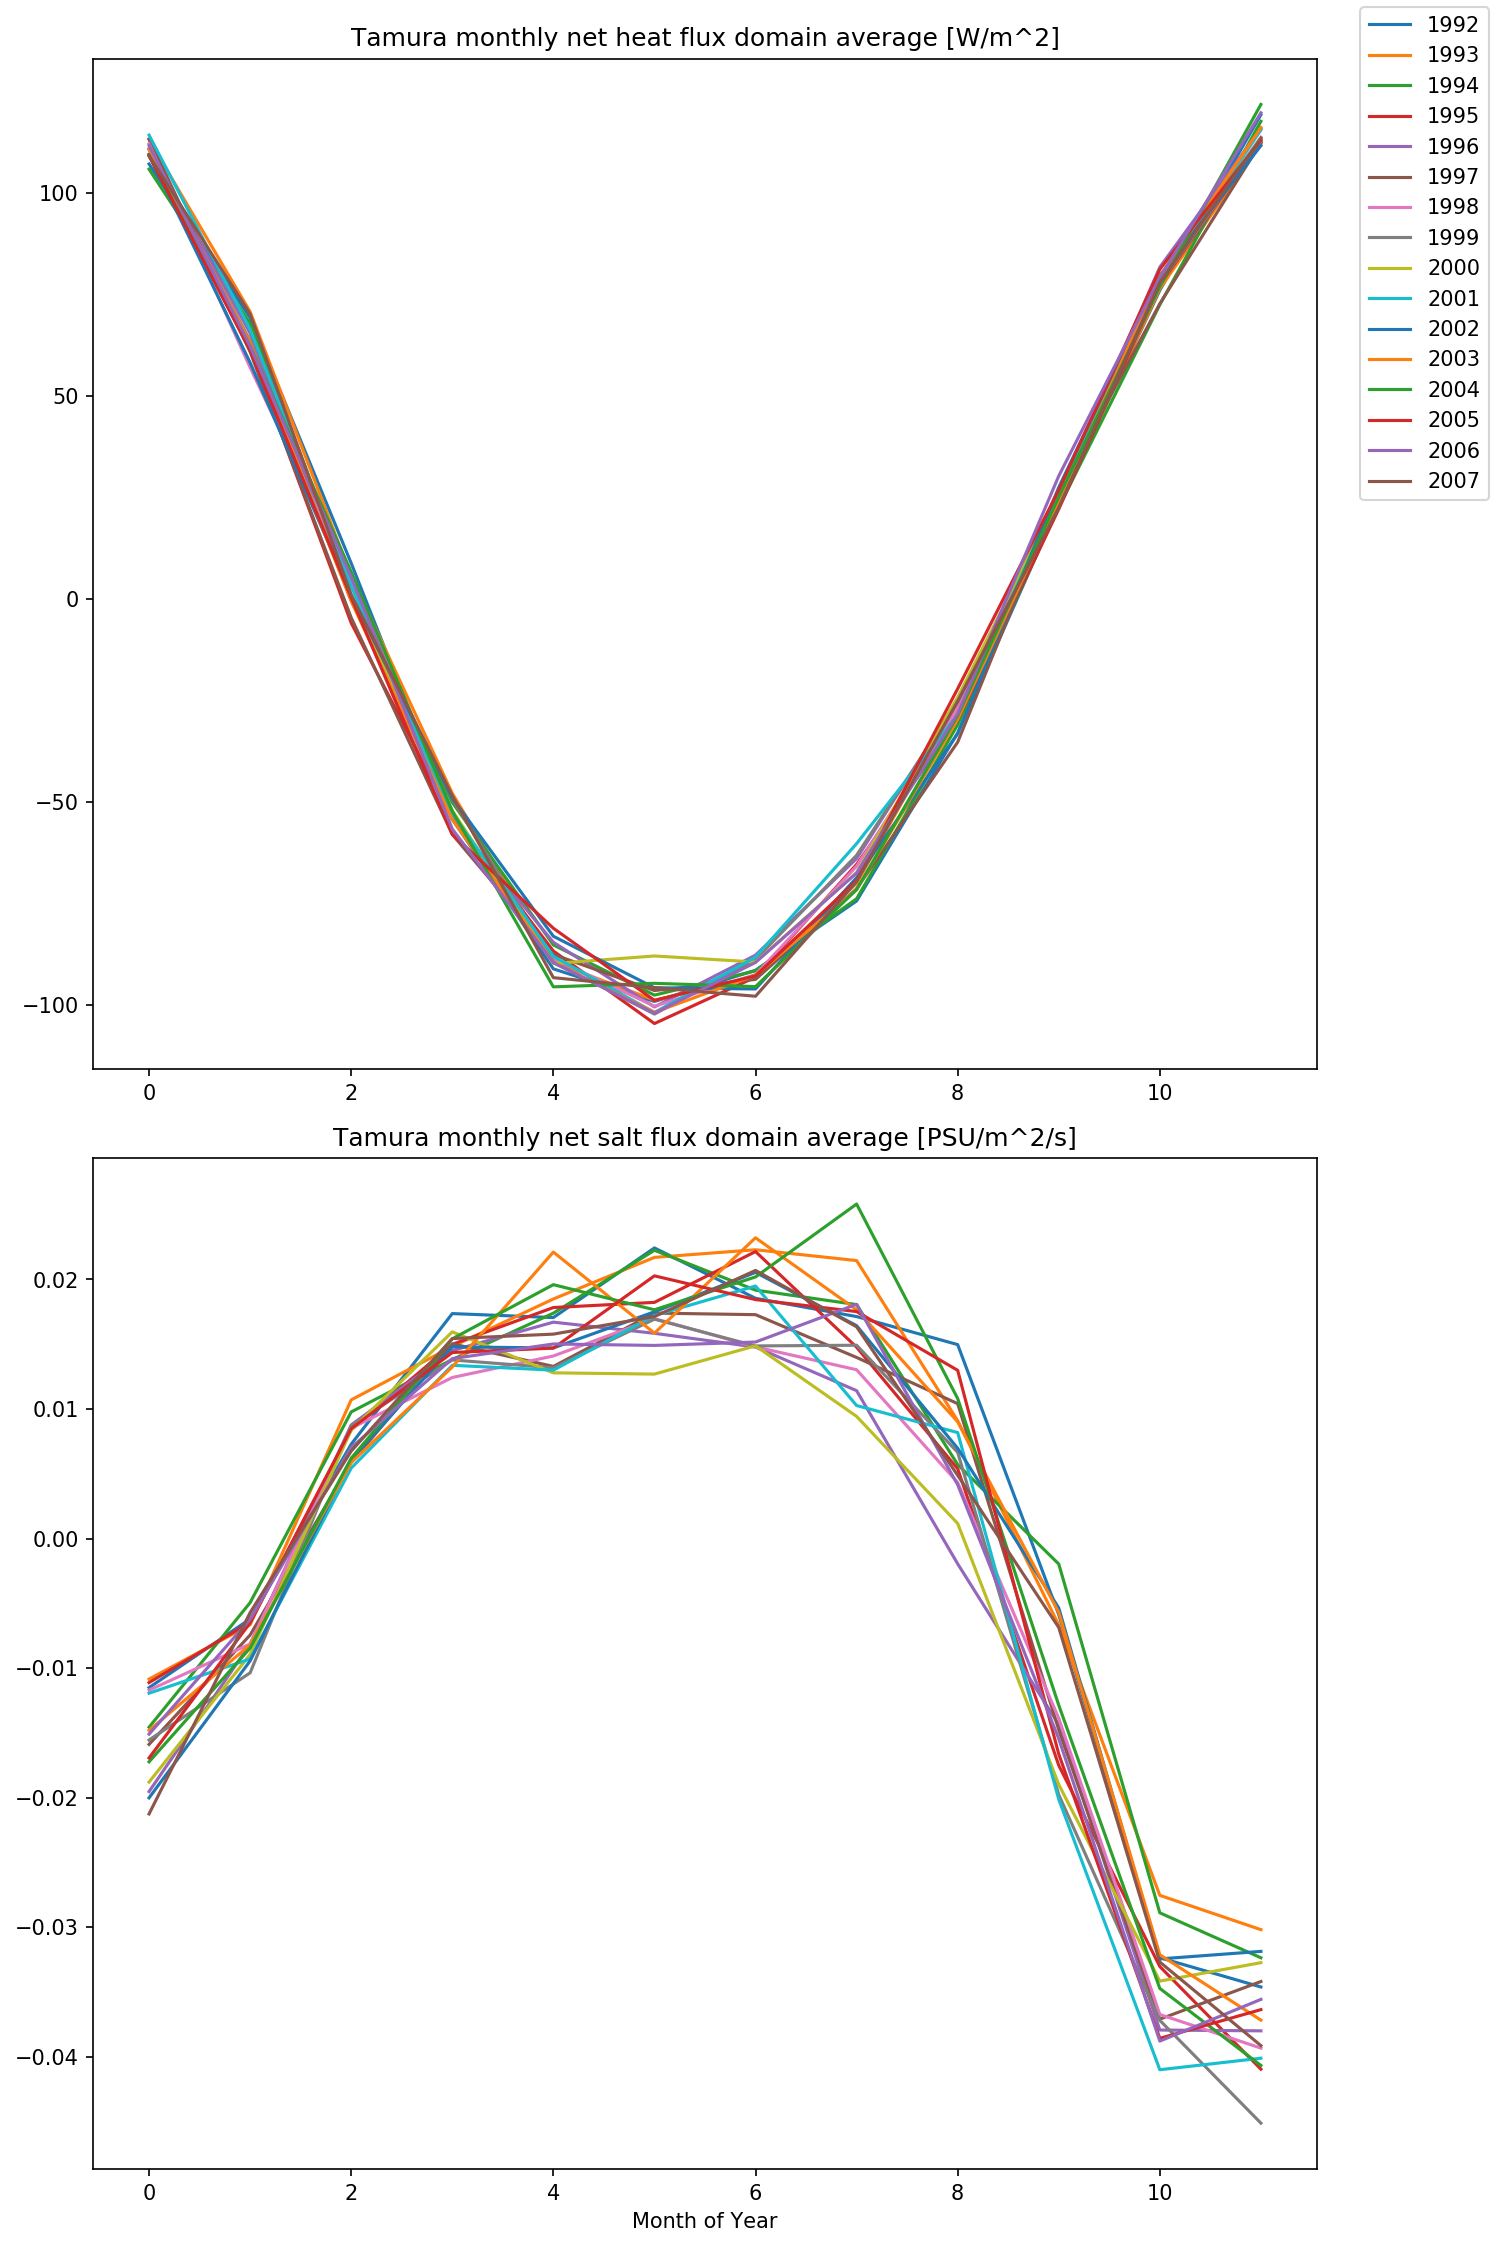

In [11]:
fig,(ax0,ax1) = plt.subplots(2,figsize=(9,15),dpi=150)
#fig.suptitle('Tamura monthly heat and salt fluxes domain average')
for ind,year in enumerate(shflux_avg_rs):
    label = str(1992+ind)
    ax0.plot(year,label=label)
ax0.set_title("Tamura monthly net heat flux domain average [W/m^2]")

for ind,year in enumerate(ssflux_avg_rs):
    label= str(1992+ind)
    ax1.plot(year,label=label)
ax1.set_title("Tamura monthly net salt flux domain average [PSU/m^2/s]")
ax1.set_xlabel('Month of Year')

fig.legend(loc=2,bbox_to_anchor=(1,1)) 
plt.tight_layout()
plt.show()

... looks like it doesnt matter!
### Plot tamura integrated heat and salt input of each year 

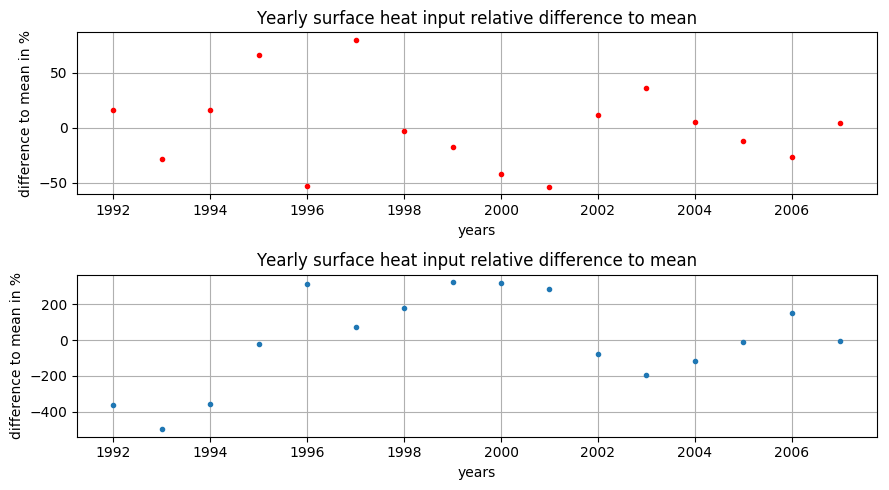

In [12]:
sh_int = np.sum(shflux_avg_rs,axis=1)
ss_int = np.sum(ssflux_avg_rs,axis=1)

sh_mean = np.mean(sh_int)
ss_mean = np.mean(ss_int)

sh_int_rel = (sh_int-sh_mean)/sh_mean*100
ss_int_rel = (ss_int-ss_mean)/ss_mean*100

plt.clf()

fig,(ax0,ax1) = plt.subplots(2,figsize=(9,5),dpi=100)

years = np.arange(1992,2008)

ax0.plot(years,sh_int_rel,'r.')
ax0.set_title("Yearly surface heat input relative difference to mean")
ax0.set_xlabel('years')
ax0.set_ylabel('difference to mean in %')
ax0.grid()

ax1.plot(years,ss_int_rel,'.')  
ax1.set_title("Yearly surface heat input relative difference to mean")
ax1.set_xlabel('years')
ax1.set_ylabel('difference to mean in %')
ax1.grid()

plt.tight_layout()
plt.show()

##  EraInterim surface stress
### Load data with Xarray and slice to southern ocean daily 1992-2007

In [1]:
import xarray as xr
import pandas as pd

In [94]:
path_era = '../../obs/Era/ERA_Interim_1992_2011.2daily.?winds.nc'
uv_raw = xr.open_mfdataset(path_era)
uv_raw

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 240, time: 13882)
Coordinates:
  * longitude  (longitude) float32 0.0 1.5 3.0 4.5 6.0 7.5 9.0 10.5 12.0 ...
  * latitude   (latitude) float32 90.0 88.5 87.0 85.5 84.0 82.5 81.0 79.5 ...
  * time       (time) datetime64[ns] 1992-01-01 1992-01-01T12:00:00 ...
Data variables:
    u10        (time, latitude, longitude) float64 dask.array<shape=(13882, 121, 240), chunksize=(13882, 121, 240)>
    v10        (time, latitude, longitude) float64 dask.array<shape=(13882, 121, 240), chunksize=(13882, 121, 240)>
Attributes:
    Conventions:  CF-1.0
    history:      2012-09-19 23:06:21 GMT by mars2netcdf-0.92

In [97]:
uv = uv_raw.sel(time=slice('1992-01-01T12:00:00','2007-01-01T12:00:00'),latitude=slice(-40,-75))

In [98]:
uv_1d = uv.resample(time='1D').mean()
uv_1d

<xarray.Dataset>
Dimensions:    (latitude: 24, longitude: 240, time: 5480)
Coordinates:
  * time       (time) datetime64[ns] 1992-01-01 1992-01-02 1992-01-03 ...
  * longitude  (longitude) float32 0.0 1.5 3.0 4.5 6.0 7.5 9.0 10.5 12.0 ...
  * latitude   (latitude) float32 -40.5 -42.0 -43.5 -45.0 -46.5 -48.0 -49.5 ...
Data variables:
    u10        (time, latitude, longitude) float64 dask.array<shape=(5480, 24, 240), chunksize=(1, 24, 240)>
    v10        (time, latitude, longitude) float64 dask.array<shape=(5480, 24, 240), chunksize=(1, 24, 240)>

### Calculate the area mean, transport to dataframe, reorder to year over dayofyear and plot u10 v10

In [154]:
df = uv_1d.mean(("latitude",'longitude')).to_dataframe()

In [159]:
df['year'] = df.index.year
df['dayofyear'] = df.index.dayofyear
df_d = df.pivot(index='dayofyear',columns='year')

<IPython.core.display.Javascript object>


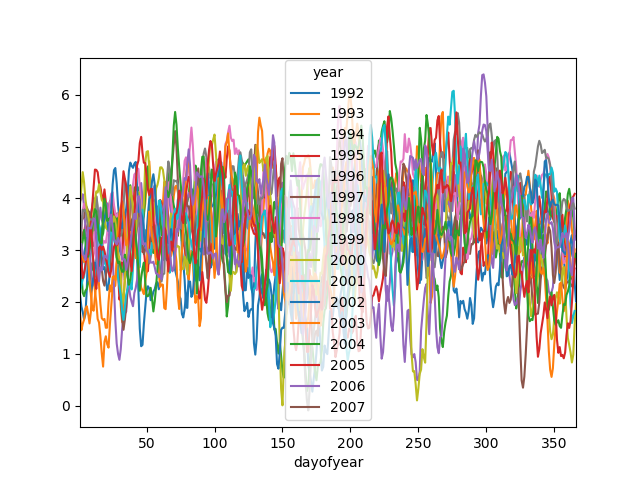

In [158]:
df_d['u10'].plot()
plt.show()